<a href="https://colab.research.google.com/github/sin-EASTER/Neural-Network-from-Scratch-MNIST-/blob/main/neural_network_frm_scratch_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST NN from scratch

 a simple two-layer neural network and trained it on the MNIST dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

datatrain=pd.read_csv("/content/mnist_train.csv")
data = pd.read_csv('/content/mnist_test.csv')

In [20]:
#training set
data= np.array(data)
m,n =data.shape
print(m,n)
np.random.shuffle(data) #shuffling data

data_dev = data[0:1000].T
Y_dev = data_dev[0].astype(int)
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

#testing set
datatrain = np.array(datatrain)
np.random.shuffle(datatrain)
a,b=datatrain.shape
data_train = datatrain[1:a].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:b]
X_train = X_train / 255.
_,m_train = X_train.shape

9999 785


In [21]:
Y_train

array([1, 1, 2, ..., 3, 2, 8])

In [22]:


def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z): #ramp fnc
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A
def sigmoid(Z):
  a= 1/(1+np.exp(-Z))
  return a

def for_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def ReLU_deriv(Z): #step fnc
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m_samples = X.shape[1] # Use the number of samples in the current batch
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_samples * dZ2.dot(A1.T)
    db2 = 1 / m_samples * np.sum(dZ2, axis=1, keepdims=True) # Sum along axis 1 and keep dimensions
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_samples * dZ1.dot(X.T)
    db1 = 1 / m_samples * np.sum(dZ1, axis=1, keepdims=True) # Sum along axis 1 and keep dimensions
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, a):
    W1 = W1 - a * dW1
    b1 = b1 - a * db1
    W2 = W2 - a * dW2
    b2 = b2 - a * db2
    return W1, b1, W2, b2

In [23]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = for_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 700)

Iteration:  0
[7 5 5 ... 8 3 5] [1 1 2 ... 3 2 8]
0.10773692456415214
Iteration:  10
[5 1 5 ... 5 1 5] [1 1 2 ... 3 2 8]
0.16415547184906162
Iteration:  20
[1 1 5 ... 5 1 5] [1 1 2 ... 3 2 8]
0.2612920430681023
Iteration:  30
[1 1 5 ... 5 1 5] [1 1 2 ... 3 2 8]
0.29310977032567753
Iteration:  40
[1 1 5 ... 3 2 5] [1 1 2 ... 3 2 8]
0.3142104736824561
Iteration:  50
[1 1 5 ... 3 2 5] [1 1 2 ... 3 2 8]
0.3343611453715124
Iteration:  60
[1 1 6 ... 3 2 8] [1 1 2 ... 3 2 8]
0.352878429280976
Iteration:  70
[1 1 6 ... 3 2 8] [1 1 2 ... 3 2 8]
0.3754791826394213
Iteration:  80
[1 1 9 ... 3 2 8] [1 1 2 ... 3 2 8]
0.40051335044501485
Iteration:  90
[1 1 1 ... 3 2 8] [1 1 2 ... 3 2 8]
0.429114303810127
Iteration:  100
[1 1 1 ... 3 2 8] [1 1 2 ... 3 2 8]
0.4611987066235541
Iteration:  110
[1 1 1 ... 3 2 8] [1 1 2 ... 3 2 8]
0.4947331577719257
Iteration:  120
[1 1 1 ... 8 2 8] [1 1 2 ... 3 2 8]
0.5241841394713157
Iteration:  130
[1 1 1 ... 8 2 8] [1 1 2 ... 3 2 8]
0.5514017133904463
Iteration:  140

In [25]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = for_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

#Examples from training set

Prediction:  [1]
Label:  1


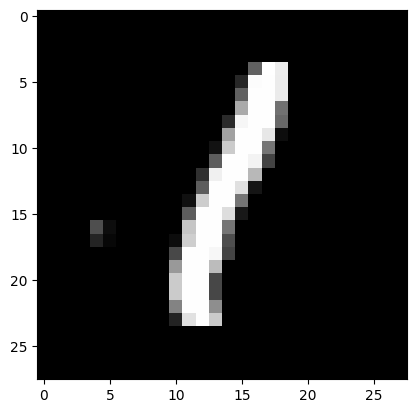

Prediction:  [1]
Label:  1


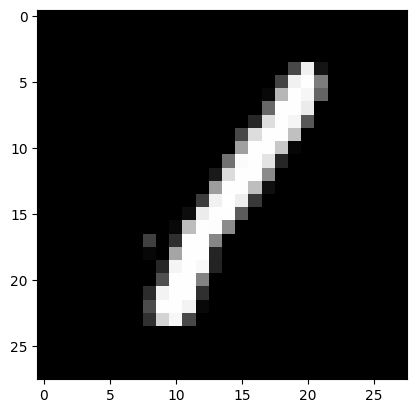

Prediction:  [2]
Label:  2


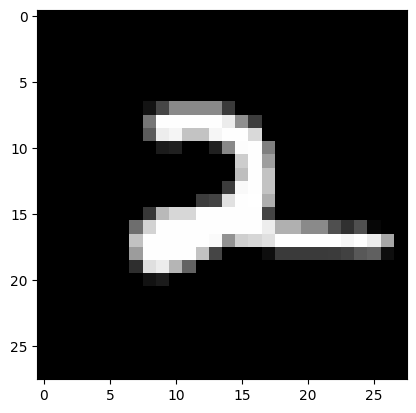

Prediction:  [5]
Label:  5


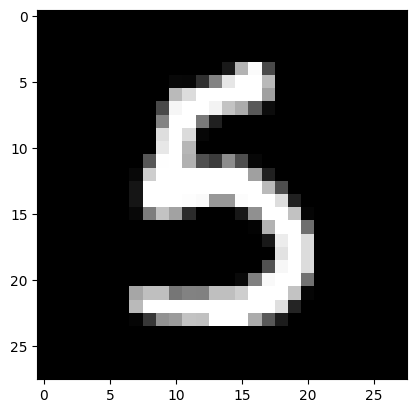

Prediction:  [7]
Label:  7


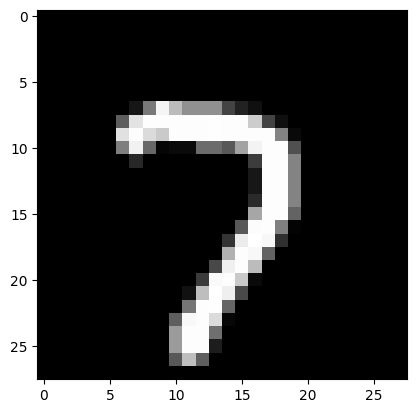

In [26]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(333, W1, b1, W2, b2)

# Test data crossvalidation

In [27]:
dev_predictions = make_predictions(X_train, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_train)

[1 1 2 ... 3 2 8] [1 1 2 ... 3 2 8]


np.float64(0.8594286476215874)